# GAN - BREATHING WAVE
## Generative Adversarial Networks
### 05 May 2023
***

## PART 1 : Data Preprocessing

### Importing Library

In [1]:
import pandas as pd
import numpy as np

### Import Dataset

In [2]:
df = pd.read_csv("dataset/breathing_waveform_data.csv").iloc[:, :-1] # get rid of last column ("notes")

### Filter the zeros values
> This will filtered the zeros value from all column (except first column)
>
> CAUSE : I think is natural for the first column to be 0.0 (because the time(X) still on 0 second)

In [3]:
zeros_val = df[df.iloc[:, 1:].eq(0).any(axis=1)]

In [4]:
zeros_val

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,labels
5473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
5474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
5475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
5476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
5477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
6143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
6144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
6145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal


### Drop the table that has value zeros on it

In [5]:
df = df[~df.isin(zeros_val)].dropna()

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,labels
0,0.483309,0.459790,0.431024,0.376565,0.295734,0.193290,0.066060,-0.083445,-0.247221,-0.409374,...,0.391514,0.452677,0.521407,0.595845,0.661691,0.702932,0.708613,0.682564,0.637765,deep
1,-2.044518,-1.935588,-1.808629,-1.667919,-1.513497,-1.348760,-1.171044,-0.972509,-0.759554,-0.547793,...,0.138731,-0.053860,-0.241691,-0.417603,-0.582320,-0.738485,-0.889731,-1.037066,-1.174654,deep
2,-1.213535,-1.269056,-1.323306,-1.375251,-1.430062,-1.485479,-1.529200,-1.557172,-1.574662,-1.575457,...,0.947940,0.996154,1.035743,1.049543,1.024204,0.954716,0.844505,0.702445,0.541555,deep
3,-0.914806,-0.887726,-0.856065,-0.823527,-0.794551,-0.768074,-0.740895,-0.713364,-0.685445,-0.652020,...,-0.478218,-0.571465,-0.684115,-0.817078,-0.966231,-1.122537,-1.264759,-1.376908,-1.461059,deep
4,-1.547469,-1.458818,-1.362120,-1.264829,-1.164948,-1.060064,-0.954496,-0.849448,-0.742812,-0.636614,...,0.227050,0.130983,0.041438,-0.038034,-0.106152,-0.163048,-0.210926,-0.253102,-0.290270,deep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,-0.152463,-0.164723,-0.165409,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,...,-0.336787,-0.306774,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,quick
26396,-0.164723,-0.165409,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,0.188025,...,-0.306774,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,0.089958,quick
26397,-0.165409,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,0.188025,0.240939,...,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,0.089958,0.179209,quick
26398,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,0.188025,0.240939,0.294399,...,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,0.089958,0.179209,0.264014,quick


## PART 2 : Generating Synthetic Data

### Importing CTGAN Library

In [7]:
from ctgan import CTGAN

### Define the discrete values inside the dataset

In [8]:
discrete_columns = [
    'labels'
]

### Setting the CTGAN and fit the GAN

In [9]:
ctgan = CTGAN(epochs=400, verbose=True)
ctgan.fit(df, discrete_columns)

Epoch 1, Loss G:  2.7348,Loss D:  0.1448
Epoch 2, Loss G:  0.6966,Loss D:  0.6625
Epoch 3, Loss G:  0.6179,Loss D:  0.3618
Epoch 4, Loss G:  0.5768,Loss D: -0.7425
Epoch 5, Loss G:  0.1019,Loss D: -0.6697
Epoch 6, Loss G:  0.8412,Loss D: -2.6949
Epoch 7, Loss G:  0.7103,Loss D: -2.6231
Epoch 8, Loss G:  0.2189,Loss D: -3.6789
Epoch 9, Loss G: -1.8155,Loss D: -1.8083
Epoch 10, Loss G: -2.5522,Loss D: -1.3859
Epoch 11, Loss G: -2.3070,Loss D: -0.3396
Epoch 12, Loss G: -1.8782,Loss D: -0.9542
Epoch 13, Loss G: -2.8192,Loss D: -0.9782
Epoch 14, Loss G: -2.1864,Loss D: -2.0044
Epoch 15, Loss G: -2.4876,Loss D: -2.6927
Epoch 16, Loss G: -1.8468,Loss D: -1.9067
Epoch 17, Loss G: -1.3217,Loss D: -1.8018
Epoch 18, Loss G: -2.8427,Loss D: -1.3304
Epoch 19, Loss G: -2.1608,Loss D: -0.6445
Epoch 20, Loss G: -2.6845,Loss D: -0.2735
Epoch 21, Loss G: -1.3936,Loss D: -1.0607
Epoch 22, Loss G: -2.9192,Loss D:  0.3435
Epoch 23, Loss G: -1.9330,Loss D: -1.0560
Epoch 24, Loss G: -1.2647,Loss D: -0.2182
E

Epoch 195, Loss G: -0.6060,Loss D: -0.3274
Epoch 196, Loss G: -1.6898,Loss D: -0.3482
Epoch 197, Loss G: -1.7458,Loss D: -0.1779
Epoch 198, Loss G: -1.4100,Loss D: -0.1884
Epoch 199, Loss G: -2.2706,Loss D: -0.4841
Epoch 200, Loss G: -1.5686,Loss D:  0.0481
Epoch 201, Loss G: -2.0770,Loss D:  0.0376
Epoch 202, Loss G: -1.8525,Loss D: -0.3898
Epoch 203, Loss G: -1.0520,Loss D: -0.2056
Epoch 204, Loss G: -0.5315,Loss D:  0.6500
Epoch 205, Loss G: -1.6844,Loss D:  0.0666
Epoch 206, Loss G:  0.0459,Loss D: -0.4716
Epoch 207, Loss G: -1.5990,Loss D: -0.5273
Epoch 208, Loss G: -0.9688,Loss D: -0.3775
Epoch 209, Loss G: -1.6046,Loss D: -0.2647
Epoch 210, Loss G: -1.3276,Loss D:  0.3617
Epoch 211, Loss G: -2.1963,Loss D:  0.1610
Epoch 212, Loss G: -1.1681,Loss D: -0.8418
Epoch 213, Loss G: -1.6902,Loss D: -0.0754
Epoch 214, Loss G: -1.4020,Loss D: -0.5276
Epoch 215, Loss G: -2.0839,Loss D: -0.2400
Epoch 216, Loss G: -1.5415,Loss D:  0.0499
Epoch 217, Loss G: -0.5242,Loss D: -0.2755
Epoch 218, 

Epoch 386, Loss G: -1.2720,Loss D: -1.0506
Epoch 387, Loss G: -0.9786,Loss D: -0.2488
Epoch 388, Loss G: -2.1169,Loss D:  0.3031
Epoch 389, Loss G: -2.1197,Loss D: -0.6043
Epoch 390, Loss G: -1.9827,Loss D: -0.1075
Epoch 391, Loss G: -1.4970,Loss D: -0.1463
Epoch 392, Loss G: -0.6184,Loss D:  0.0112
Epoch 393, Loss G: -0.3335,Loss D: -0.0802
Epoch 394, Loss G: -0.9429,Loss D: -0.4438
Epoch 395, Loss G: -0.8239,Loss D: -0.6548
Epoch 396, Loss G: -1.1923,Loss D:  0.4150
Epoch 397, Loss G: -1.5539,Loss D: -0.4645
Epoch 398, Loss G: -1.2619,Loss D: -0.5079
Epoch 399, Loss G: -0.7158,Loss D:  0.0307
Epoch 400, Loss G: -0.6725,Loss D: -0.4787


### Generate synthetic data

In [10]:
samples = ctgan.sample(1000)

### Evaluate Data

(25726, 86) (1000, 86)


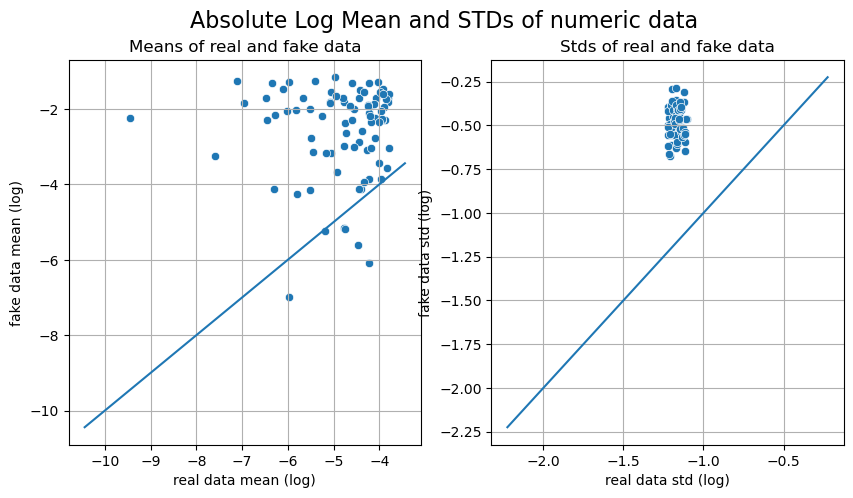

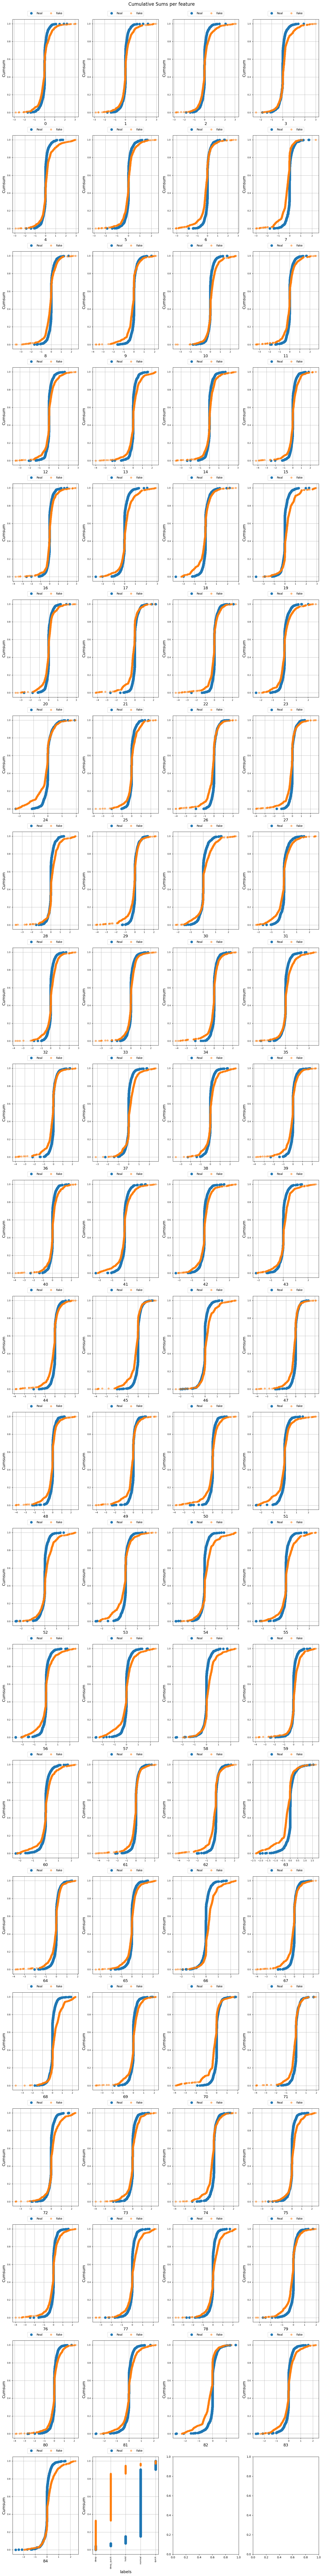

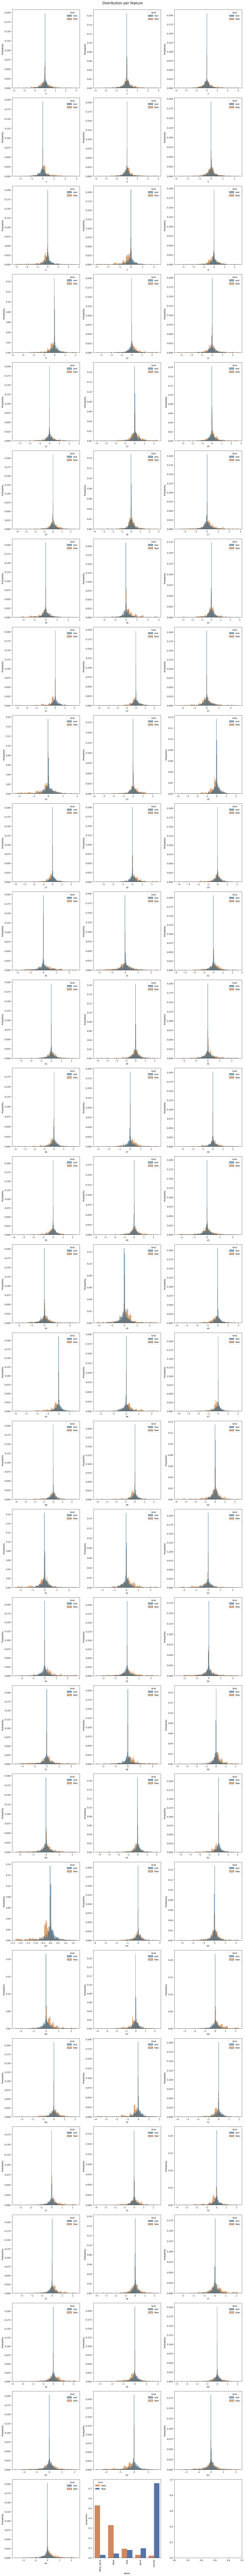

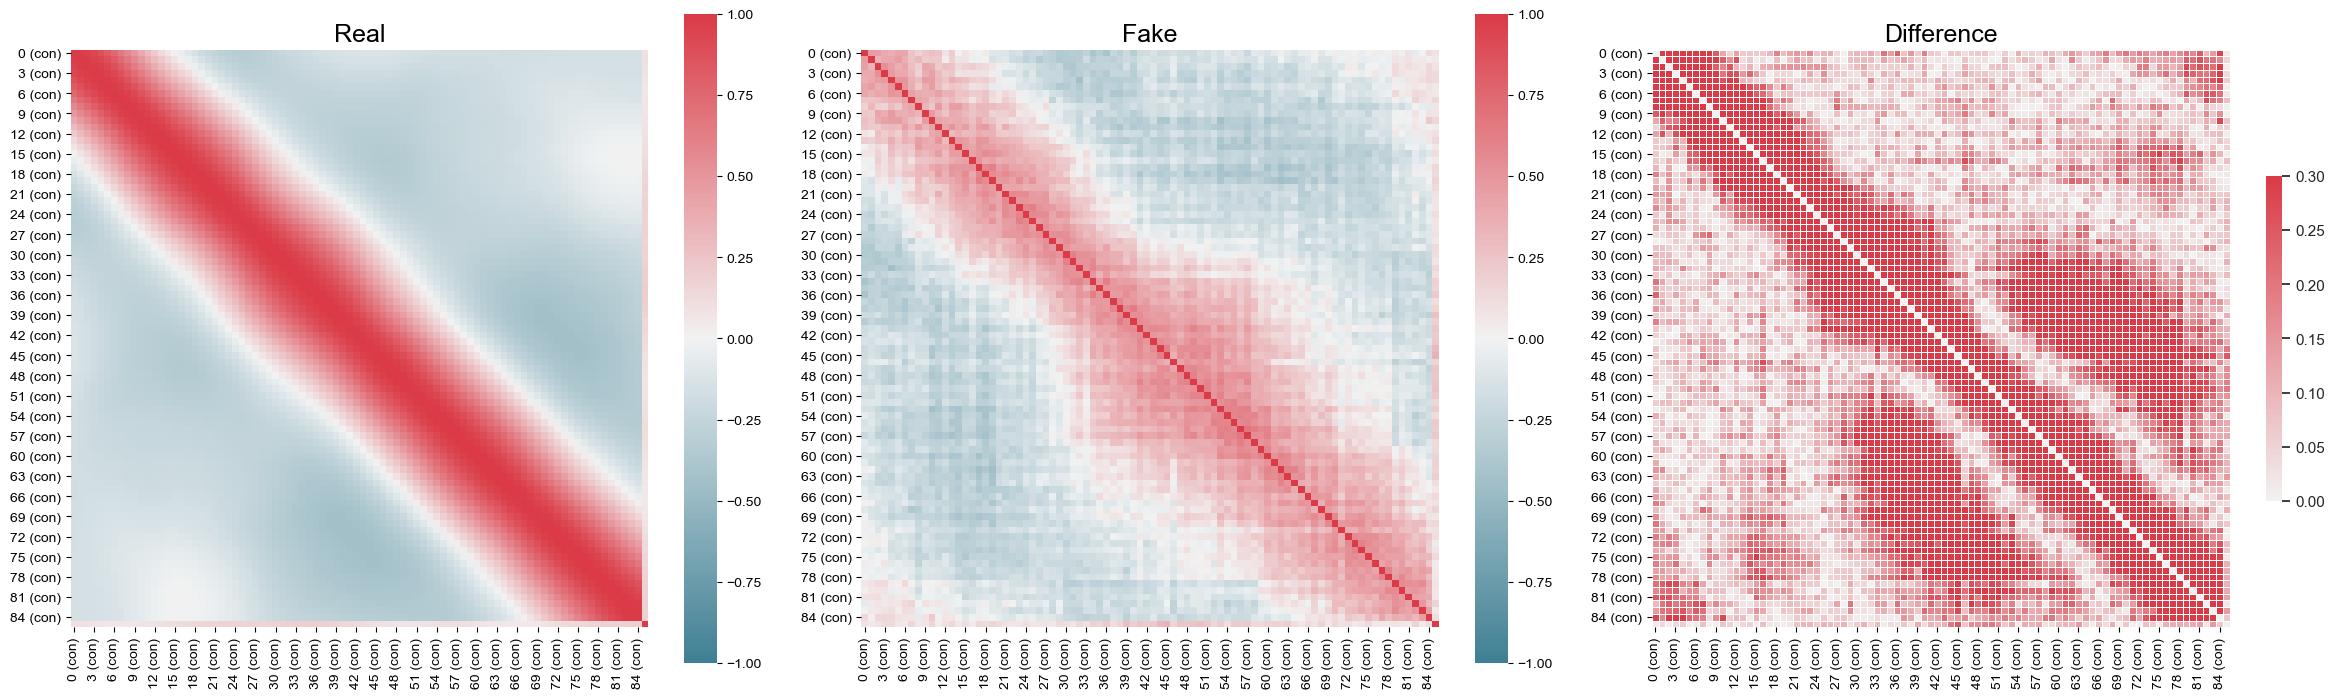

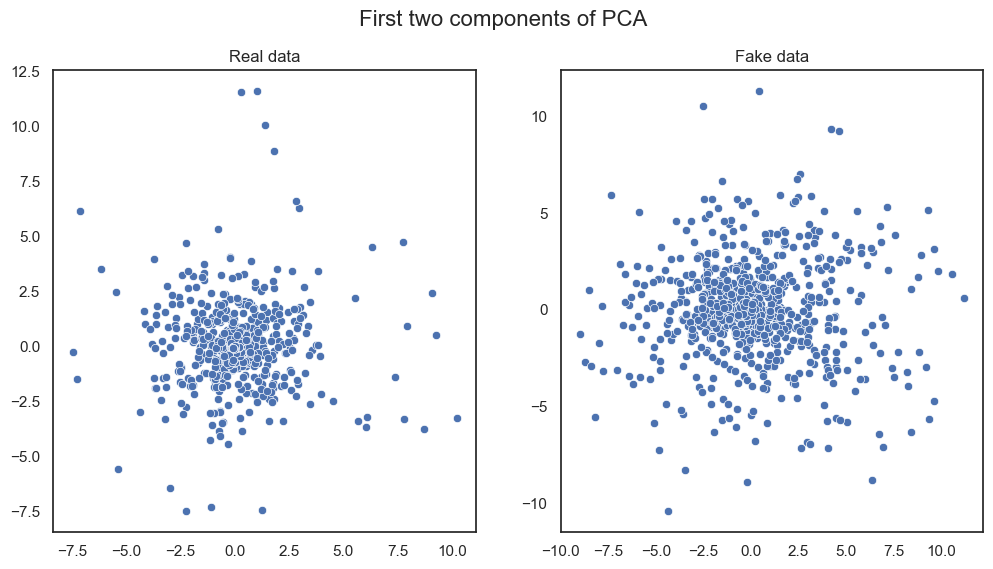

In [11]:
from table_evaluator import TableEvaluator

print(df.shape, samples.shape)
table_evaluator = TableEvaluator(df, samples, cat_cols=discrete_columns)

table_evaluator.visual_evaluation()

In [12]:
samples

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,labels
0,0.266029,-0.489615,-0.033643,0.010926,0.317071,-0.136812,-0.094597,-0.583729,-0.508108,-0.489794,...,-0.771650,-0.020480,-0.296201,-0.096728,-0.000099,0.328135,-0.009589,-0.517990,0.084441,deep_quick
1,0.061399,-0.061182,0.319847,-0.084173,0.124350,0.850302,0.068589,-0.115008,0.319788,0.676550,...,-0.196163,-0.206185,-0.374487,-0.879303,-0.669086,-0.337570,-0.690938,-1.086998,0.085637,deep_quick
2,-0.462638,0.080080,-0.628098,-0.161092,-0.176134,-0.140991,-1.123267,-1.428018,-0.790480,-0.643571,...,0.184544,0.459043,1.072998,-0.289867,0.872578,0.978392,0.000496,0.023835,0.766552,deep_quick
3,0.018444,0.012323,-0.000902,-0.000517,0.207047,-0.199630,-0.165353,-0.021439,-0.009435,-0.009840,...,0.005866,0.248587,-0.071000,0.240197,0.176315,0.207393,-0.049917,0.172818,0.204887,deep_quick
4,-0.116147,-0.391074,0.493860,0.263348,0.222759,-0.408344,-0.458372,-0.310256,-0.646351,-0.495257,...,0.102117,0.283518,0.297775,0.375056,0.257186,-0.102811,0.131555,-0.015806,-0.035772,deep_quick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.710761,-0.014155,0.015213,-0.015585,0.012014,-0.020197,-0.103741,-0.020581,-0.047689,-0.150172,...,0.021252,0.016463,0.009042,-0.015113,0.025091,-0.009493,-0.015473,-0.005666,0.004638,deep
996,0.337965,0.408804,0.243414,-0.059588,0.345057,0.175774,0.025480,-0.574035,0.895766,-0.477159,...,-0.022237,0.473363,0.504948,-0.116292,-0.019999,-0.083927,0.093477,0.089598,0.049941,deep_quick
997,0.013520,-0.006279,0.121721,0.000928,0.032380,-0.010819,-0.136095,-0.418190,-0.115845,0.193189,...,0.306405,0.482428,0.006358,0.010832,0.214200,-0.154652,-0.004767,-0.213163,0.125987,deep_quick
998,-0.727122,-0.434797,-1.091220,-0.045593,-0.300133,-0.080017,-0.943530,-0.688545,0.384510,-0.721248,...,-0.930842,-0.135699,-1.047869,-1.586867,-0.708421,-1.661710,-0.561044,-0.464968,-0.136575,deep_quick


## PART 3 : Data Preprocessing

### Preprocess the generated data

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
    
def data_preprocessing(X, Y):
    ## DATA
    sc = StandardScaler()
    X = sc.fit_transform(X)
    # reshaping the training data to 3-Dimensional Numpy Array
    feature = 5
    X = np.reshape(X, (X.shape[0], int(85/feature), feature))
    # (26400, 17, 5)
    # 5 indicator will be used per sequence/timestep per sample/row
    
    ## LABEL
    # encode class values as integers [0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2]
    encoder.fit(Y)
    encoded_Y = encoder.transform(Y)

    # convert integers to dummy variables (i.e. one hot encoded)
    hot_y = np_utils.to_categorical(encoded_Y)
    
    return X, hot_y

In [14]:
X = samples.iloc[:, :-1]
Y = samples.iloc[:, -1]

In [15]:
X_test, Y_test = data_preprocessing(X, Y)

## PART 4 : Predict the generated data using pre-trained model

### Import pre-trained model

In [16]:
from tensorflow.keras.models import load_model
filename = "C:\\Users\\IoT-Lab\\Documents\\!Erwin Yonata\\Anasa\\MODELS\\[3-layer] - 3L1\\CV\\GridSearchCV\\best_param_model.h5"

# load model
loaded_model = load_model(filename)

### Make prediction using generated data

In [17]:
pred = loaded_model.predict(X_test)

32/32 [==============================] - 1s 4ms/step


## PART 5 : Evaluate

### Plot confusion matrix

In [18]:
y_true = np.argmax(Y_test, axis=1)
y_pred = np.argmax(pred, axis=1)

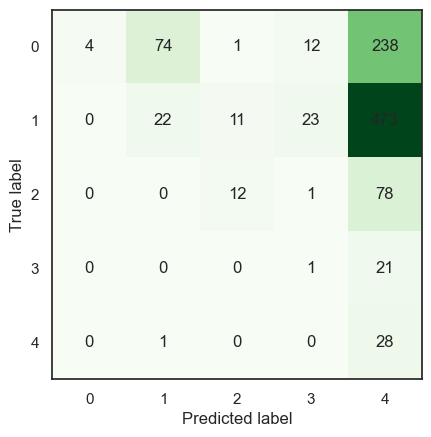

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Define the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

# Add labels to the plot
tick_marks = np.arange(len(conf_matrix))
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Add values to the plot
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center')

# Show the plot
plt.show()

### Create Data Frame for generated result vs prediction result

In [20]:
def revert_back(hot_y):
    # Revert one-hot encoded representation to original labels
    reversed_labels = np.argmax(hot_y, axis=1)

    # Transform the reversed labels back to the original integer labels
    original_labels = encoder.inverse_transform(reversed_labels)
    
    return original_labels

In [21]:
rb_pred = revert_back(pred)
rb_Y_test = revert_back(Y_test)

In [22]:
df_pred = pd.DataFrame(np.array(list(zip(rb_Y_test, rb_pred))), columns=[["generated", "prediction"]])

In [23]:
df_pred['generated'].value_counts()

(generated,)
deep_quick      529
deep            329
hold             91
quick            29
normal           22
dtype: int64

In [24]:
df_pred['prediction'].value_counts()

(prediction,)
quick            838
deep_quick        97
normal            37
hold              24
deep               4
dtype: int64

### Evaluate the predicted label with the generated label

In [25]:
score = loaded_model.evaluate(X_test, Y_test)
print("Accuracy \t: {:.2f}".format(score[1]*100))
print("Loss \t\t: {:.2f}".format(score[0]*100))

32/32 [==============================] - 1s 4ms/step - loss: 11.0606 - accuracy: 0.0670
Accuracy 	: 6.70
Loss 		: 1106.06
